<a href="https://colab.research.google.com/github/Ojas45shinde/Ojas45shinde/blob/main/internship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TITLE :**
**INTERNSHIP PROJECT** <br>
AIM :
SUPERVISED MACHINE LEARNING MODEL FOR THE CLASSIFICATION


**IMPORTING NECCESSARY LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sks
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

**LOADING DATASET**

In [ ]:
df=pd.read_csv("C:/Users/acer/Desktop/jupyter/StudentsPerformance_3.csv")

**SHOWING TOP 5 RECORDS**

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
X=df.drop(columns=["math score"],axis=1)

In [ ]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [ ]:
Y=df["math score"]
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

**DISPLAYING FEATUES PRESENT IN EACH CATEGORIES**

In [ ]:
print("Categories in Gender feature:   ",end="")
print(df["gender"].unique())
print("Categories in race/ethnicity feature:   ",end="")
print(df["race/ethnicity"].unique())
print("Categories in parental level of education feature:   ",end="")
print(df["parental level of education"].unique())
print("Categories in lunch feature:   ",end="")
print(df["lunch"].unique())
print("Categories in test preparation course feature:   ",end="")
print(df["test preparation course"].unique())

Categories in Gender feature:   ['female' 'male']
Categories in race/ethnicity feature:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education feature:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch feature:   ['standard' 'free/reduced']
Categories in test preparation course feature:   ['none' 'completed']


**TRANSFORMING COLUMNS**

In [ ]:
#creation of transforming columns:
num_columns=X.select_dtypes(exclude="object").columns
cat_columns=X.select_dtypes(include="object").columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

num_trans=StandardScaler()
oh_trans=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_trans,cat_columns),
        ("StandardScaler",num_trans,num_columns)
    ]
)


In [ ]:
x=preprocessor.fit_transform(X)

In [ ]:
x.shape

(1000, 19)

**TRAINING AND TESTING DATASET**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2,random_state=23)

In [ ]:
#create and evaluate function to give all metrics after model training
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2=r2_score(true,predicted)
    return mae,rmse,r2

In [ ]:
models={
    "LR":LinearRegression(),
    "lasso":Lasso(),
    "Ridge":Ridge(),
    "KNN":KNeighborsRegressor(),
    "DT":DecisionTreeRegressor(),
    "RF":RandomForestRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)


    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for training dataset")
    print("root mean squared error: {:.4f}".format(model_train_rmse))
    print("root Absolute error: {:.4f}".format(model_train_mae))
    print("-R2 Score: {:.4f}".format(model_train_r2))

    print("------------------------------------------------")

    print("Model Performance for testing dataset")
    print("root mean squared error: {:.4f}".format(model_test_rmse))
    print("root Absolute error: {:.4f}".format(model_test_mae))
    print("-R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print("\n")


LR
Model Performance for training dataset
root mean squared error: 5.2633
root Absolute error: 4.1697
-R2 Score: 0.8813
------------------------------------------------
Model Performance for testing dataset
root mean squared error: 5.6228
root Absolute error: 4.5788
-R2 Score: 0.8523


lasso
Model Performance for training dataset
root mean squared error: 6.5500
root Absolute error: 5.1997
-R2 Score: 0.8162
------------------------------------------------
Model Performance for testing dataset
root mean squared error: 6.5967
root Absolute error: 5.1005
-R2 Score: 0.7967


Ridge
Model Performance for training dataset
root mean squared error: 5.2594
root Absolute error: 4.1672
-R2 Score: 0.8815
------------------------------------------------
Model Performance for testing dataset
root mean squared error: 5.6191
root Absolute error: 4.5672
-R2 Score: 0.8525


KNN
Model Performance for training dataset
root mean squared error: 5.7594
root Absolute error: 4.5617
-R2 Score: 0.8579
------------

**RESULTS**

In [ ]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model Name","R2 Score"]).sort_values(by=["R2 Score"],ascending=False)

,Model Name,R2 Score
2,Ridge,0.852517
0,LR,0.852322
5,RF,0.802556
1,lasso,0.796734
3,KNN,0.763004
4,DT,0.642692


**LINEAR REGRESSION**


In [ ]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f"%score)

Accuracy of the model is 85.23


**PLOTTING**

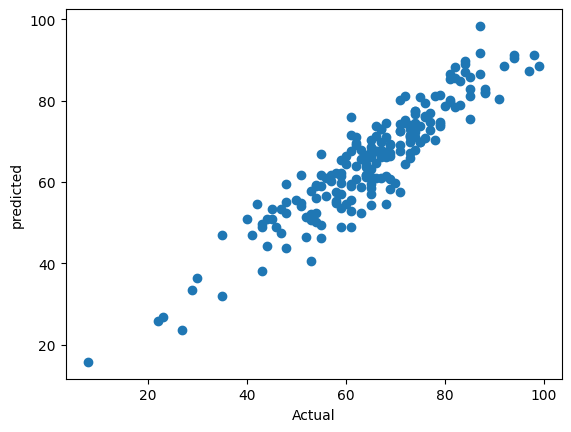

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel("predicted")
plt.show()

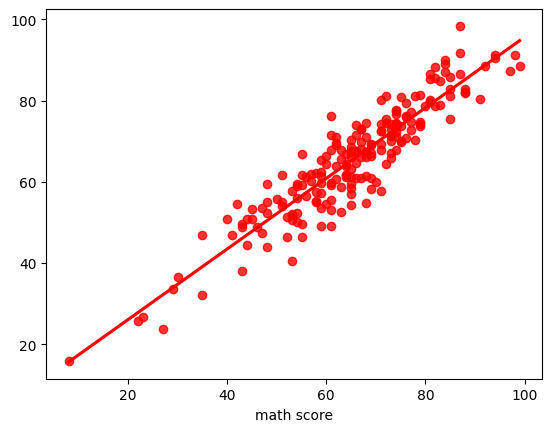

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None, color="red")
plt.show()

In [ ]:
pred_df=pd.DataFrame({"actual":y_test,"Predicted":y_pred,"difference":y_test-y_pred})
pred_df

,actual,Predicted,difference
519,67,66.03125,0.96875
837,75,69.87500,5.12500
208,74,67.93750,6.06250
525,68,70.96875,-2.96875
978,55,49.53125,5.46875
...,...,...,...
647,64,61.65625,2.34375
481,52,46.50000,5.50000
134,74,73.43750,0.56250
366,69,58.34375,10.65625


 **THE FINAL RESULT IS, THE LINAER REGRESSION MODEL PERFORMED VERY WELL. <br>
THUS THE ACCURACY SCORE OF THE MODEL WAS 85.23%**